In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('KNN_Project_Data',index_col=0)

In [5]:
df.head()

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
XVPM,,,,,,,,,,
1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [9]:
df_feat = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [10]:
df_feat

array([[-0.44343461,  1.61980773, -0.9582548 , ..., -0.93279392,
         1.00831307, -1.06962723],
       [-1.05657361,  1.7419175 , -1.50422015, ..., -0.46186435,
         0.25832069, -1.04154625],
       [-0.43698145,  0.77579285,  0.21339413, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.97901454,  0.83771499,  0.01401811, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [-0.99239881,  0.0303711 ,  1.06295359, ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.79510909,  1.12180047,  1.18594424, ..., -1.25156478,
        -0.60352946, -0.87985868]])

In [11]:
df_feature = pd.DataFrame(df_feat,columns=df.columns[:-1])

In [12]:
df_feature.head()

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [13]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_feature, df['TARGET CLASS'], test_size=0.3, random_state=101)

In [18]:
X_train

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
290,-0.018554,-0.079399,0.982093,-0.321720,-1.130540,-1.106023,0.194763,-0.452992,-0.322474
167,-1.689740,0.257413,0.430801,1.234619,-0.092057,0.926614,-0.222843,0.294700,1.333316
486,-1.169816,0.272174,-0.748102,-0.376545,-1.310755,1.196297,-1.539157,-0.498940,-0.657784
683,0.386086,0.189835,0.382034,-1.976215,1.200304,1.800290,0.651946,1.203692,-0.173654
876,-0.412586,1.444908,0.330387,0.656949,0.299770,0.507379,-0.568271,-0.061135,-2.217078
...,...,...,...,...,...,...,...,...,...
575,0.062053,-0.705295,-2.079875,-1.449433,-0.799082,1.873326,0.686651,0.346299,-1.130251
838,2.176742,1.173371,0.141676,-0.375129,0.106478,-0.842854,1.996686,-1.531655,0.001460
337,0.552590,-1.372636,0.378254,0.916928,0.365400,-1.347375,-0.853849,0.899254,1.316637
523,0.300187,-1.536335,0.585133,-0.529769,-1.570165,-0.692331,-0.914993,0.394708,-0.117782


In [19]:
X_test

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
545,-0.599657,1.924813,-0.090185,0.772421,-0.895233,1.479259,-0.298195,-0.401863,-1.296124
298,-1.221593,-0.952874,-2.510832,0.854841,-0.579728,0.457152,1.344598,0.598795,0.508832
109,0.087078,-2.071814,-1.640502,-0.691600,1.463442,0.158673,0.279232,0.154550,-0.222792
837,-1.473391,1.074731,-1.380181,-1.070043,-1.783643,0.818014,-0.662259,-0.185789,0.240667
194,0.372327,-0.162185,-1.586054,-0.285094,-2.112736,-0.639152,-1.586716,-1.020200,0.558123
...,...,...,...,...,...,...,...,...,...
847,-0.081689,-0.840369,0.110726,0.039910,-0.058568,1.499544,-0.589061,-1.074613,-0.364681
682,-1.595935,-0.635725,1.027217,0.302116,-0.027573,-0.300973,1.587533,0.644500,0.731266
884,0.504203,0.167427,1.526383,-1.869491,-0.374559,0.723769,2.067418,1.139497,-0.503969
325,0.077513,0.835837,1.780547,-0.105726,1.668595,-0.948474,1.228552,-0.415257,-0.099650


In [44]:
y_train

XVPM
248.684758     1
1266.270996    1
1243.962068    1
1236.758186    1
1047.488718    1
              ..
1532.187623    1
1446.863149    0
1402.076198    0
656.980071     0
1273.616570    1
Name: TARGET CLASS, Length: 700, dtype: int64

In [45]:
y_test

XVPM
1145.465616    1
1703.065445    1
1390.453454    0
1097.361350    1
1243.908774    0
              ..
525.576341     1
617.060897     1
1387.907067    0
1066.754812    0
1058.557700    0
Name: TARGET CLASS, Length: 300, dtype: int64

In [55]:
from sklearn.neighbors import KNeighborsClassifier

# Let's first find range of K for which error_rate will minimum

In [48]:
error_rate =[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predd = knn.predict(X_test)
    error_rate.append(np.mean(predd!=y_test))
    
    

Text(0, 0.5, 'Error rate')

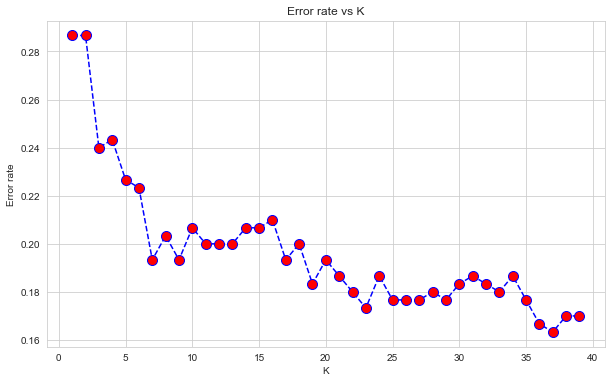

In [56]:
sns.set_palette('GnBu_r')
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',ls='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs K')
plt.xlabel('K')
plt.ylabel('Error rate')

# After evaluting range of K we got to know that at k=37 we are getting least error_rate so.........
   

In [50]:
knn = KNeighborsClassifier(n_neighbors=37)

In [51]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=37)

In [52]:
predd = knn.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix, classification_report

In [54]:
print('Confusion report')
print(confusion_matrix(y_test,predd))
print('\n')
print('classfication report')
print(classification_report(y_test,predd))

Confusion report
[[126  26]
 [ 23 125]]


classfication report
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       152
           1       0.83      0.84      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

